## Statistical and Machine Learning, Fall 2024

### Week 10: Neural Networks in Action
### Instructor: Farhad Pourkamali 

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/farhad-pourkamali/MATH6388Online/blob/main/Week10.ipynb)



### Overview
<hr style="border:2px solid gray">

* **Network Depth and Width:** Choosing the right depth (number of hidden layers) and width (number of neurons per layer) is critical for balancing expressiveness and computational efficiency. Deeper networks can capture more complex patterns.

* **Activation Functions:** The choice of activation function significantly impacts the learning capacity of a neural network. Functions like ReLU, tanh, and sigmoid influence how non-linear transformations are applied, which in turn affects the network's ability to model complex data relationships.

* **Adaptive Activation Functions:** Unlike traditional fixed activation functions, adaptive activation functions adjust based on the data or training progress, improving network flexibility. These functions can reduce training time and improve generalization, especially in tasks with varying complexity.

* **Hyperparameter Optimization:** Tuning hyperparameters such as learning rate, batch size, and regularization strength is crucial for achieving optimal performance. In this lecture, we will focus on full grid search, with more advanced techniques to be covered in a future session.

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)

2.15.0


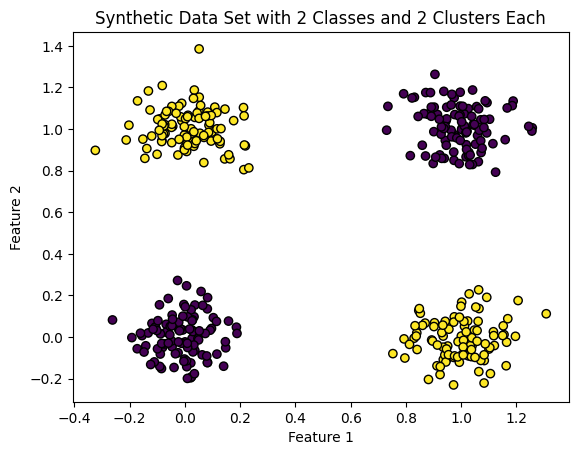

In [2]:
from sklearn.datasets import make_blobs

# Set random seed for reproducibility
np.random.seed(42)

# Create synthetic data set
X, y = make_blobs(n_samples=400, centers=[[0, 0], [0, 1], [1, 0], [1, 1]], cluster_std=.1, random_state=42)

y[y == 0] = 0
y[y == 1] = 1
y[y == 2] = 1
y[y == 3] = 0


# Plot the synthetic data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolors='k')
plt.title('Synthetic Data Set with 2 Classes and 2 Clusters Each')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from sklearn.model_selection import train_test_split

# Split the data into training and testing/validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25, random_state=42)

print(X_train.shape, X_test.shape)


(300, 2) (100, 2)


In [4]:
def create_model(num_hidden_layers=1, num_units=32):
    
    """
    Creates and compiles a Sequential neural network model using the Keras API.
    
    Parameters:
    -----------
    num_hidden_layers : int, optional, default=1
        The number of hidden layers to include in the model. Must be at least 1.
        
    num_units : int, optional, default=32
        The number of units (neurons) in each hidden layer.

    Returns:
    --------
    model : keras.models.Sequential
        A compiled Keras Sequential model configured for binary classification.
    """
    
    model = Sequential()
    
    model.add(Dense(num_units, input_dim=X_train.shape[1], activation='elu'))

    for _ in range(num_hidden_layers - 1):
        
        model.add(Dense(num_units, activation='elu'))

    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', 
                  optimizer=tf.keras.optimizers.legacy.SGD(learning_rate=0.1), 
                  metrics=['accuracy'])
    
    return model

In [5]:
from sklearn.metrics import accuracy_score

hidden_layers_list = [1, 2, 3]

num_units_list = [2, 4, 6]

best_accuracy = 0

best_params = {}

# Grid search
for num_hidden_layers in hidden_layers_list:
    
    for num_units in num_units_list:
        
        print(f"Training model with {num_hidden_layers} hidden layers and {num_units} units.")

        model = create_model(num_hidden_layers=num_hidden_layers, num_units=num_units)
        
        model.fit(X_train, y_train, epochs=50, batch_size=16, verbose=0)

        # Evaluate on the test set
        y_pred = (model.predict(X_test)>0.5).astype(int).ravel()
        accuracy = accuracy_score(y_test, y_pred)

        print(f"Accuracy: {accuracy}")

        # Update best parameters if accuracy is improved
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_params = {'num_hidden_layers': num_hidden_layers, 'num_units': num_units}

print("Best parameters:", best_params)

print("Best accuracy:", best_accuracy)


Training model with 1 hidden layers and 2 units.
4/4 [==============================] - 0s 4ms/step
Accuracy: 0.67
Training model with 1 hidden layers and 4 units.
4/4 [==============================] - 0s 4ms/step
Accuracy: 1.0
Training model with 1 hidden layers and 6 units.
4/4 [==============================] - 0s 114ms/step
Accuracy: 1.0
Training model with 2 hidden layers and 2 units.
4/4 [==============================] - 0s 5ms/step
Accuracy: 1.0
Training model with 2 hidden layers and 4 units.
4/4 [==============================] - 0s 4ms/step
Accuracy: 1.0
Training model with 2 hidden layers and 6 units.
4/4 [==============================] - 0s 4ms/step
Accuracy: 1.0
Training model with 3 hidden layers and 2 units.
4/4 [==============================] - 0s 4ms/step
Accuracy: 0.52
Training model with 3 hidden layers and 4 units.
4/4 [==============================] - 0s 4ms/step
Accuracy: 1.0
Training model with 3 hidden layers and 6 units.
4/4 [==============================

### We can add the choice of activation function 

In [6]:
def create_model(num_hidden_layers=1, num_units=32, activation='relu'):
    """
    Creates and compiles a Sequential neural network model using the Keras API.

    Parameters:
    -----------
    num_hidden_layers : int, optional, default=1
        The number of hidden layers to include in the model. Must be at least 1.
    
    num_units : int, optional, default=32
        The number of units (neurons) in each hidden layer.
    
    activation : str, optional, default="relu"
        The activation function to use for the hidden layers.

    Returns:
    --------
    model : keras.models.Sequential
        A compiled Keras Sequential model configured for binary classification.
    """
    
    model = Sequential()
    
    model.add(Dense(num_units, input_dim=X_train.shape[1], activation=activation))

    for _ in range(num_hidden_layers - 1):
        model.add(Dense(num_units, activation=activation))

    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.legacy.SGD(learning_rate=0.1),
                  metrics=['accuracy'])
    
    return model

In [7]:
hidden_layers_list = [1, 2, 3]
num_units_list = [2, 4]
activation_functions = ['relu', 'elu', 'swish']

best_accuracy = 0
best_params = {}

# Grid search
for num_hidden_layers in hidden_layers_list:
    for num_units in num_units_list:
        for activation_function in activation_functions:
            
            print(f"Training model with {num_hidden_layers} hidden layers, {num_units} units, and activation function {activation_function}.")

            model = create_model(num_hidden_layers=num_hidden_layers, 
                                 num_units=num_units, activation=activation_function)
                  
            model.fit(X_train, y_train, epochs=20, batch_size=16, verbose=0)

            # Evaluate on the test set
            y_pred = (model.predict(X_test)>0.5).astype(int).ravel()
            accuracy = accuracy_score(y_test, y_pred)

            print(f"Accuracy: {accuracy}")

            # Update best parameters if accuracy is improved
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_params = {'num_hidden_layers': num_hidden_layers, 'num_units': num_units, 'activation_function': activation_function}

print("Best parameters:", best_params)
print("Best accuracy:", best_accuracy)

Training model with 1 hidden layers, 2 units, and activation function relu.
4/4 [==============================] - 0s 2ms/step
Accuracy: 0.33
Training model with 1 hidden layers, 2 units, and activation function elu.
4/4 [==============================] - 0s 3ms/step
Accuracy: 0.74
Training model with 1 hidden layers, 2 units, and activation function swish.
4/4 [==============================] - 0s 3ms/step
Accuracy: 0.74
Training model with 1 hidden layers, 4 units, and activation function relu.
4/4 [==============================] - 0s 2ms/step
Accuracy: 0.42
Training model with 1 hidden layers, 4 units, and activation function elu.
4/4 [==============================] - 0s 2ms/step
Accuracy: 0.45
Training model with 1 hidden layers, 4 units, and activation function swish.
4/4 [==============================] - 0s 4ms/step
Accuracy: 1.0
Training model with 2 hidden layers, 2 units, and activation function relu.
4/4 [==============================] - 0s 2ms/step
Accuracy: 0.42
Trainin

### Image Classifier

<hr style="border:2px solid gray">

* Building an Image Classifier using the Sequential API
    * Work with the Fashion MNIST data set
    * Steps: 
        * Preparing the data
        * Creating the model (number of hidden layers, ...)
        * Compiling the model (loss function, optimizer, ...)
        * Training the model 
        * Using the model to make predictions 
        
<img src="https://github.com/farhad-pourkamali/MATH6388/blob/main/images/fmnist.png?raw=true\" width=400>

In [8]:
# The dataset is already divided into train/test sets 

fashion_mnist = keras.datasets.fashion_mnist

(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

print(X_train_full.shape, X_test.shape, X_train_full.dtype)

(60000, 28, 28) (10000, 28, 28) uint8


In [9]:
# Split the train set into a validation set and a (smaller) train set

X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

print(X_test.dtype)

float64


In [10]:
# Type of labels

y_train[:10]

array([4, 0, 7, 9, 9, 9, 4, 4, 3, 4], dtype=uint8)

In [11]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5543, 5444, 5496, 5499, 5512, 5507, 5507, 5488, 5510, 5494]))

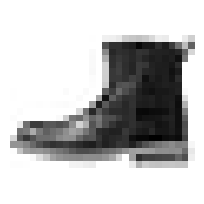

In [12]:
plt.figure(figsize=(7.2, 2.4))

plt.imshow(X_train[3], cmap='binary')
plt.axis('off')
plt.show()

In [13]:
# Creating the model using the Sequential API

model = keras.models.Sequential()

model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu")) # 300 neurons, activation function: ReLU 
model.add(keras.layers.Dense(100, activation="relu")) # 100 neurons
model.add(keras.layers.Dense(10, activation="softmax")) # 10 classes so "softmax"


In [14]:
# Another way to create the model with a "list" of layers

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [15]:
model.summary()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_84 (Dense)            (None, 300)               235500    
                                                                 
 dense_85 (Dense)            (None, 100)               30100     
                                                                 
 dense_86 (Dense)            (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
# How can we calculate the number of parameters? 

300*785 + 100 * 301 + 10 * 101

266610

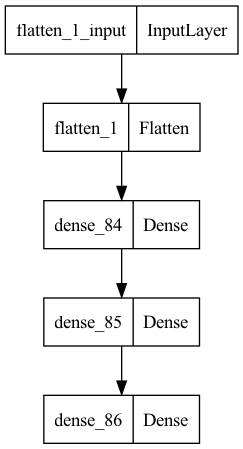

In [17]:
# Visualize the model 

from keras.utils import plot_model

plot_model(model, to_file='model.png')

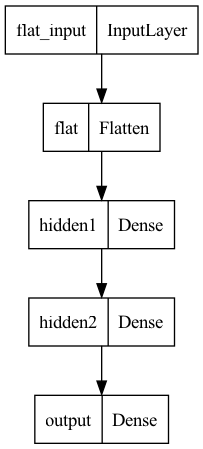

In [18]:
# Name layers 
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28], name='flat'),
    keras.layers.Dense(300, activation="relu", name='hidden1'),
    keras.layers.Dense(100, activation="relu", name='hidden2'),
    keras.layers.Dense(10, activation="softmax", name='output')
])

plot_model(model, to_file='model.png')

In [19]:
model.layers

In [20]:
# All the parameters of a layer can be accessed using its 

layer = model.layers[1]

print(layer.name)

hidden1


In [21]:
weights, biases = layer.get_weights()

print(weights.shape, biases.shape)

(784, 300) (300,)


In [22]:
# Compiling the model 

model.compile(loss="sparse_categorical_crossentropy", # "sparse" because labels are 0,1,2,...
              optimizer="sgd",
              metrics=["accuracy"]) 

In [23]:
# Training the model 

history = model.fit(X_train, y_train, batch_size=64, epochs=5,
                    validation_data=(X_valid, y_valid))

Epoch 1/5
860/860 [==============================] - 5s 5ms/step - loss: 0.8550 - accuracy: 0.7130 - val_loss: 0.6831 - val_accuracy: 0.7444
Epoch 2/5
860/860 [==============================] - 3s 4ms/step - loss: 0.5655 - accuracy: 0.8059 - val_loss: 0.5439 - val_accuracy: 0.8196
Epoch 3/5
860/860 [==============================] - 3s 4ms/step - loss: 0.5135 - accuracy: 0.8224 - val_loss: 0.5233 - val_accuracy: 0.8138
Epoch 4/5
860/860 [==============================] - 4s 4ms/step - loss: 0.4882 - accuracy: 0.8312 - val_loss: 0.4935 - val_accuracy: 0.8228
Epoch 5/5
860/860 [==============================] - 3s 4ms/step - loss: 0.4708 - accuracy: 0.8360 - val_loss: 0.4590 - val_accuracy: 0.8414


In [24]:
# Why do we have 860 updates in each epoch? 

np.ceil(55000/64)

860.0

In [25]:
# What is included in history? 

history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

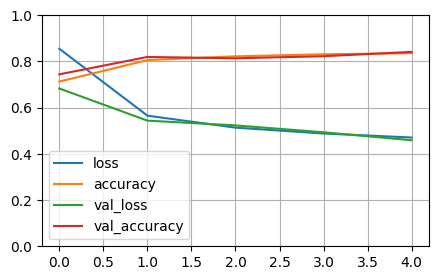

In [26]:
pd.DataFrame(history.history).plot(figsize=(5, 3))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [27]:
# evaluate the model 

model.evaluate(X_test, y_test, batch_size=10000) # one batch 


1/1 [==============================] - 0s 324ms/step - loss: 0.4925 - accuracy: 0.8262


[0.49246224761009216, 0.826200008392334]

In [28]:
# making predictions 

X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 338ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.17, 0.  , 0.24, 0.  , 0.58],
       [0.  , 0.  , 0.79, 0.  , 0.02, 0.  , 0.19, 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [29]:
y_pred = np.argmax(y_proba, axis=1)
y_pred

array([9, 2, 1])

### Functional API
<hr style="border:2px solid gray">

* In this illustration, we delve into the influence of activation functions on the precision of neural networks, exploring the effects of three distinct activation functions
    * Rectified Linear Unit (ReLU)
    * Exponential Linear Unit (ELU)
    * Softplus

* The Functional API in Keras allows you to create custom neural network architectures with more flexibility than the Sequential API
    * Define Input Layer: `input_layer = Input(shape=(input_shape,))`
    * Create Layers and Connect Them: `hidden_layer = Dense(128, activation='relu')(input_layer)` and `output_layer = Dense(output_shape, activation='softmax')(hidden_layer)`
    * Model Declaration: `model = keras.Model(inputs=input_layer, outputs=output_layer)`

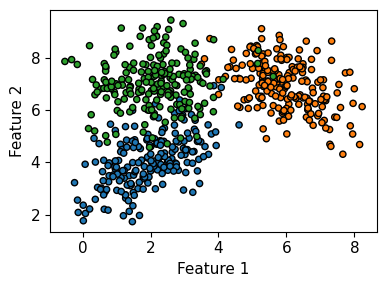

In [30]:
# Set random seed for reproducibility
np.random.seed(5)

# Generate synthetic data for three-class classification
mean_class_1 = [2, 4]
cov_class_1 = [[1, 0.5], [0.5, 1]]
data_class_1 = np.random.multivariate_normal(mean_class_1, cov_class_1, 200)

mean_class_2 = [6, 7]
cov_class_2 = [[1, -0.5], [-0.5, 1]]
data_class_2 = np.random.multivariate_normal(mean_class_2, cov_class_2, 200)

mean_class_3 = [2, 7]
cov_class_3 = [[1, 0], [0, 1]]
data_class_3 = np.random.multivariate_normal(mean_class_3, cov_class_3, 200)

# Combine the three classes into a single dataset
X = np.vstack((data_class_1, data_class_2, data_class_3))
y = np.hstack((np.zeros(200), np.ones(200), 2 * np.ones(200)))  

# Plot the synthetic data
plt.rcParams.update({'font.size': 11, "figure.figsize": (4,3)})
colors = {0: "#1f77b4", 1: "#ff7f0e", 2:  "#2ca02c", 3: "#d62728"}
y_col = list(map(colors.get, y))

plt.scatter(X[:, 0], X[:, 1], c=y_col, marker='o', s=20, edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.tight_layout()
plt.show()

In [31]:
from sklearn.model_selection import train_test_split 

y = y.astype(int)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

print(X_train.shape, X_test.shape)

(420, 2) (180, 2)


In [32]:
from sklearn.metrics import accuracy_score 

activation_functions = ["softplus", "elu", "relu"]

def create_model(activation):
    """
    MLP with one hidden layer and different choices of
    activation functions
    """
    
    inputs_ = keras.Input(shape=(2,), name='input')
    
    hidden = keras.layers.Dense(2, activation=activation, name='hidden')(inputs_)
    
    outputs_ = keras.layers.Dense(3, activation="softmax", name='output')(hidden)
    
    model = keras.Model(inputs=inputs_, outputs=outputs_)
    
    return model

keras.utils.set_random_seed(seed=4)

for item in activation_functions:
    
    keras.backend.clear_session()
    
    model = create_model(item)
    
    # Compile 
    model.compile(loss="sparse_categorical_crossentropy", 
              optimizer="sgd",
              metrics=["accuracy"]) 
    
    # Train 
    model.fit(X_train, y_train, epochs=40, batch_size=32, verbose=0)
    
    # Evaluate 
    print(str(item) + ": " + str(accuracy_score(y_test, model.predict(X_test).argmax(axis=1))))
    

6/6 [==============================] - 0s 4ms/step
softplus: 0.45
6/6 [==============================] - 0s 2ms/step
elu: 0.7111111111111111
6/6 [==============================] - 0s 2ms/step
relu: 0.6444444444444445


* The `Concatenate` layer in Keras is a merge layer that allows you to combine or "concatenate" multiple input tensors along a specified axis. This is particularly useful when building complex models, such as multi-input models or when merging intermediate layers in a neural network

* In this example, we will create a model with three branches, each using a different activation function, and then concatenate the outputs of these branches before the final output layer

In [33]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Dense, Concatenate

# Define input shape
input_dim = 2
input_shape = (input_dim,)

keras.utils.set_random_seed(seed=4)

# Define the input layer
input_layer = Input(shape=input_shape)

# Create two branches with different activation functions
branch_1 = Dense(2, activation='elu')(input_layer)
branch_2 = Dense(2, activation='softplus')(input_layer)
branch_3 = Dense(2, activation='relu')(input_layer)


# Concatenate the outputs of the two branches
concatenated = Concatenate()([branch_1, branch_2, branch_3])

# Output layer
output_dim = 3
output_layer = Dense(output_dim, activation='softmax')(concatenated)

# Create the model
model = keras.Model(inputs=input_layer, outputs=output_layer)

# Compile the model
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

# Train
model.fit(X_train, y_train, epochs=40, batch_size=32, verbose=0)

 
# Evaluate 
print("combined" + ": " + str(accuracy_score(y_test, model.predict(X_test).argmax(axis=1))))
    


6/6 [==============================] - 0s 4ms/step
combined: 0.8555555555555555


### Adaptive Activation Functions
<hr style="border:2px solid gray">


* Fixed activation functions are chosen before training 
    * Remain unchanged throughout the training process

* These fixed functions might not be optimal for all layers or tasks
    * Leading to suboptimal performance

* Trainable activation functions are neural network components that adapt and learn their parameters during training

    * Instead of using a fixed mathematical function like ReLU, trainable activation functions learn their function's shape from data
    * Trainable activation functions are often implemented as additional neural network layers 

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from keras.layers import Dense

tf.keras.utils.set_random_seed(5)

# Load the Iris dataset
data = load_iris()
X, y = data.data, data.target

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a custom activation function with a learnable parameter
class CustomActivation(tf.keras.layers.Layer):
    def __init__(self, units=1, **kwargs):
        super(CustomActivation, self).__init__(**kwargs)
        self.units = units

    def build(self, input_shape):
        self.alpha = self.add_weight(
            shape=(self.units,),
            initializer='ones',
            trainable=True,
            name='alpha',
        )
        super(CustomActivation, self).build(input_shape)

    def call(self, x):
        return tf.keras.activations.relu(self.alpha * x) 

# Create a Sequential model
model_with_custom_activation = keras.Sequential()

# Add a hidden layer with the custom activation function
model_with_custom_activation.add(Dense(32, activation=CustomActivation(units=1)))

# Add an output layer (3 classes in Iris dataset)
model_with_custom_activation.add(Dense(3, activation='softmax'))

# Compile the model with SGD optimizer
optimizer = keras.optimizers.SGD(learning_rate=0.01)
model_with_custom_activation.compile(loss='sparse_categorical_crossentropy', 
                                     optimizer=optimizer, metrics=['accuracy'])

# Train the model
model_with_custom_activation.fit(X_train, y_train, epochs=100, batch_size=16, 
                                 validation_split=0.1, verbose=0)

# Evaluate the model on the test set
test_loss, test_accuracy = model_with_custom_activation.evaluate(X_test, y_test)
print(f'Test accuracy with Custom Activation: {test_accuracy * 100:.2f}%')

2024-10-07 10:19:55.564495: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node SGD/AssignVariableOp.


1/1 [==============================] - 0s 70ms/step - loss: 0.1719 - accuracy: 1.0000
Test accuracy with Custom Activation: 100.00%


In [35]:
model_with_custom_activation.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 32)                161       
                                                                 
 dense_5 (Dense)             (None, 3)                 99        
                                                                 
Total params: 260 (1.02 KB)
Trainable params: 260 (1.02 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [36]:
model_with_custom_activation.weights[2]

<tf.Variable 'dense_4/custom_activation/alpha:0' shape=(1,) dtype=float32, numpy=array([1.7303294], dtype=float32)>

In [37]:
tf.keras.utils.set_random_seed(5)


# Create a Sequential model without the custom activation function
model_without_custom_activation = keras.Sequential()


# Add a hidden layer
model_without_custom_activation.add(Dense(32, activation='relu'))

# Add an output layer (3 classes in Iris dataset)
model_without_custom_activation.add(Dense(3, activation='softmax'))

# Compile the model with SGD optimizer
optimizer = keras.optimizers.SGD(learning_rate=0.01)
model_without_custom_activation.compile(loss='sparse_categorical_crossentropy', 
                                        optimizer=optimizer, metrics=['accuracy'])

# Train the model
model_without_custom_activation.fit(X_train, y_train, epochs=100, batch_size=16, 
                                    validation_split=0.1, verbose=0)

# Evaluate the model on the test set
test_loss, test_accuracy = model_without_custom_activation.evaluate(X_test, y_test)
print(f'Test accuracy without Custom Activation: {test_accuracy * 100:.2f}%')


2024-10-07 10:21:20.767330: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node SGD/AssignVariableOp.


1/1 [==============================] - 0s 32ms/step - loss: 0.2263 - accuracy: 0.9667
Test accuracy without Custom Activation: 96.67%


### Wide & Deep Learning

* The following model is referred to as a wide and deep network because it combines both linear models (the "wide" part) and deep neural networks (the "deep" part) into a single model

In [56]:
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Input, Dense, concatenate
from tensorflow.keras.models import Model

# Load California housing dataset
housing = fetch_california_housing()
X, y = housing.data, housing.target

ind = y < 4
X = X[ind]
y = y[ind]


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [57]:
ind, ind.shape

(array([False,  True,  True, ...,  True,  True,  True]), (20640,))

In [58]:
X_train_scaled.shape

(15095, 8)

In [59]:
# Define the shallow part (linear model)
shallow_input = Input(shape=(2,), name='shallow_input')
shallow_output = Dense(1, activation='linear', name='shallow_output')(shallow_input)

# Define the deep part (deep neural network)
deep_input = Input(shape=(6,), name='deep_input')
deep_hidden1 = Dense(64, activation='relu', name='hidden1')(deep_input)
deep_hidden2 = Dense(32, activation='relu', name='hidden2')(deep_hidden1)
deep_output = Dense(1, activation='linear', name='deep_output')(deep_hidden2)

# Combine the wide and deep parts
combined_output = concatenate([shallow_output, deep_output], name='combined_output')

# Final output layer for regression
output = Dense(1, activation='linear', name='output')(combined_output)

# Create the model
model = Model(inputs=[shallow_input, deep_input], outputs=output)

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Display the model summary
model.summary()


Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 deep_input (InputLayer)     [(None, 6)]                  0         []                            
                                                                                                  
 hidden1 (Dense)             (None, 64)                   448       ['deep_input[0][0]']          
                                                                                                  
 shallow_input (InputLayer)  [(None, 2)]                  0         []                            
                                                                                                  
 hidden2 (Dense)             (None, 32)                   2080      ['hidden1[0][0]']             
                                                                                            

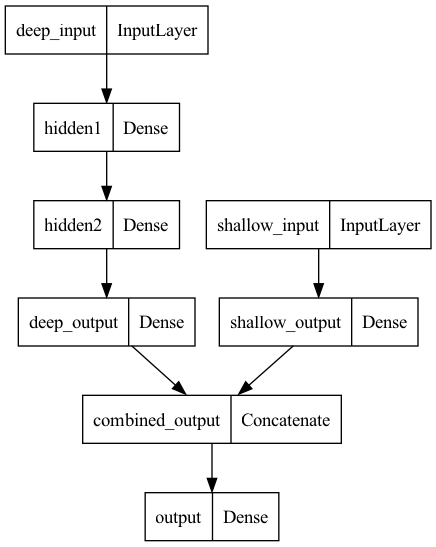

In [60]:
from tensorflow.keras.utils import plot_model

plot_model(model)

In [61]:
# Train the model
model.fit([X_train_scaled[:,:2], X_train_scaled[:,2:]], y_train, epochs=20, batch_size=64)


Epoch 1/20
236/236 [==============================] - 1s 4ms/step - loss: 1.0739 - mae: 0.7332
Epoch 2/20
236/236 [==============================] - 1s 4ms/step - loss: 0.4075 - mae: 0.4444
Epoch 3/20
236/236 [==============================] - 1s 4ms/step - loss: 0.5499 - mae: 0.4310
Epoch 4/20
236/236 [==============================] - 1s 5ms/step - loss: 0.6114 - mae: 0.4256
Epoch 5/20
236/236 [==============================] - 1s 5ms/step - loss: 0.3721 - mae: 0.4372
Epoch 6/20
236/236 [==============================] - 1s 4ms/step - loss: 0.3247 - mae: 0.4223
Epoch 7/20
236/236 [==============================] - 1s 4ms/step - loss: 0.7961 - mae: 0.4489
Epoch 8/20
236/236 [==============================] - 1s 4ms/step - loss: 1.1902 - mae: 0.4411
Epoch 9/20
236/236 [==============================] - 1s 3ms/step - loss: 0.8609 - mae: 0.4250
Epoch 10/20
236/236 [==============================] - 1s 3ms/step - loss: 0.7961 - mae: 0.4313
Epoch 11/20
236/236 [============================

118/118 [==============================] - 0s 1ms/step


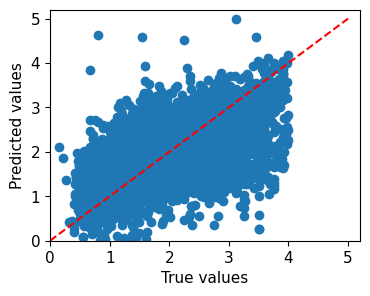

In [62]:
# Make predictions 
import matplotlib.pyplot as plt

y_pred = model.predict([X_test_scaled[:,:2], X_test_scaled[:,2:]])
plt.plot(y_test, y_pred, 'o')
plt.plot([0,5], [0, 5], 'r--')
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.xlim([0,5.2])
plt.ylim([0,5.2])
plt.show()